# <center>Olympic Athletes</center>

### 1. Import data

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load olympics data set
olympics = pd.read_csv('athlete_events.csv')
olympics.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
# Load NOC data set
noc = pd.read_csv('noc_regions.csv')
noc.head()


,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


### 2. Join data tables

In [4]:
# merge data sets on noc
data = pd.merge(olympics, noc, how='left', on='NOC', sort=False)
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


### 3. Filter data to get summer_olympics data set

In [5]:
# filter for summer olympics
summer_olympics = data[data['Season'] == 'Summer']
summer_olympics = pd.DataFrame(summer_olympics)
summer_olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


In [6]:
# Explore data
summer_olympics.describe()

,ID,Age,Height,Weight,Year
count,222552.000000,213363.000000,170695.000000,168698.00000,222552.000000
mean,67998.925712,25.674053,175.515551,70.68906,1976.317094
std,39139.038228,6.699839,10.914725,14.80394,30.942802
min,1.000000,10.000000,127.000000,25.00000,1896.000000
25%,34000.750000,21.000000,168.000000,60.00000,1956.000000
50%,68302.500000,24.000000,175.000000,70.00000,1984.000000
75%,101881.000000,28.000000,183.000000,79.00000,2000.000000
max,135568.000000,97.000000,226.000000,214.00000,2016.000000


In [7]:
summer_olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222552 entries, 0 to 271110
Data columns (total 17 columns):
ID        222552 non-null int64
Name      222552 non-null object
Sex       222552 non-null object
Age       213363 non-null float64
Height    170695 non-null float64
Weight    168698 non-null float64
Team      222552 non-null object
NOC       222552 non-null object
Games     222552 non-null object
Year      222552 non-null int64
Season    222552 non-null object
City      222552 non-null object
Sport     222552 non-null object
Event     222552 non-null object
Medal     34088 non-null object
region    222182 non-null object
notes     4401 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 30.6+ MB


### 4. Missing values

Observations that were missing data from the 'Age', 'Height', or 'Weight' columns were removed. The deleted observations  included athletes that did not medal in their sports during and prior to the 1920 olympic games. The refined dataset, summer_olympics, now includes 166,706 observations that each include the olympian's age, height, and weight.

Missing values in the 'Medal' column were left as is since each NaN value represents an olympian who competed but did not receive a medal in their competition. Missing values in the 'notes' column were also left intact as the notes column simply contains a more specific geographic region for certain players (ex: athletes representing Trinidad/Tobago have a specific island origin location designated in the notes column). 

In [8]:
#Remove NaN values from age/height/weight columns
summer_olympics = summer_olympics.dropna(subset=['Age', 'Height', 'Weight'])
summer_olympics.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,NaN,Finland,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN


In [9]:
#Check for any other NaN values in unexpected places
summer_olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166706 entries, 0 to 271110
Data columns (total 17 columns):
ID        166706 non-null int64
Name      166706 non-null object
Sex       166706 non-null object
Age       166706 non-null float64
Height    166706 non-null float64
Weight    166706 non-null float64
Team      166706 non-null object
NOC       166706 non-null object
Games     166706 non-null object
Year      166706 non-null int64
Season    166706 non-null object
City      166706 non-null object
Sport     166706 non-null object
Event     166706 non-null object
Medal     25341 non-null object
region    166436 non-null object
notes     3132 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 22.9+ MB


### 5. Exploring data

In [10]:
#Search for outliers and trends
summer_olympics.groupby(['Age', 'Height','Weight', 'Sport']).count()

ID  Name  Sex  Team  NOC  Games  Year  \
Age  Height Weight Sport                                                        
11.0 158.0  50.0   Swimming              4     4    4     4    4      4     4   
12.0 145.0  41.0   Swimming              1     1    1     1    1      1     1   
     160.0  50.0   Swimming              2     2    2     2    2      2     2   
            60.0   Swimming              4     4    4     4    4      4     4   
     163.0  58.0   Swimming              1     1    1     1    1      1     1   
     164.0  46.0   Swimming              4     4    4     4    4      4     4   
     168.0  58.0   Swimming              3     3    3     3    3      3     3   
     169.0  56.0   Athletics             2     2    2     2    2      2     2   
     170.0  48.0   Rowing                1     1    1     1    1      1     1   
            50.0   Rowing                1     1    1     1    1      1     1   
            55.0   Swimming              1     1    1     1    1      1     1   
     171.0  57.0   Swimming              2     2    2     2    2      2     2   
     175.0  65.0   Swimming              1     1    1     1    1      1     1   
13.0 140.0  52.5   Swimming              1     1    1     1    1      1     1   
     142.0  28.0   Gymnastics            6     6    6     6    6      6     6   
     146.0  40.0   Rowing                2     2    2     2    2      2     2   
     148.0  37.0   Diving                1     1    1     1    1      1     1   
     150.0  30.0   Rhythmic Gymnastics   1     1    1     1    1      1     1   
            37.0   Gymnastics            6     6    6     6    6      6     6   
            40.0   Gymnastics            6     6    6     6    6      6     6   
     152.0  41.0   Rowing                1     1    1     1    1      1     1   
     153.0  39.0   Swimming              1     1    1     1    1      1     1   
     155.0  43.0   Gymnastics            5     5    5     5    5      5     5   
            45.0   Swimming              2     2    2     2    2      2     2   
            47.0   Diving                1     1    1     1    1      1     1   
                   Gymnastics            6     6    6     6    6      6     6   
            58.0   Swimming              3     3    3     3    3      3     3   
     156.0  44.0   Swimming              3     3    3     3    3      3     3   
            48.0   Rowing                1     1    1     1    1      1     1   
     157.0  45.0   Swimming              2     2    2     2    2      2     2   
...                                     ..   ...  ...   ...  ...    ...   ...   
61.0 178.0  89.0   Shooting              1     1    1     1    1      1     1   
     182.0  87.0   Sailing               1     1    1     1    1      1     1   
     185.0  76.0   Equestrianism         2     2    2     2    2      2     2   
     188.0  72.0   Equestrianism         2     2    2     2    2      2     2   
62.0 157.0  48.0   Equestrianism         1     1    1     1    1      1     1   
     172.0  66.0   Equestrianism         1     1    1     1    1      1     1   
     173.0  70.0   Shooting              1     1    1     1    1      1     1   
     183.0  83.0   Shooting              2     2    2     2    2      2     2   
     189.0  84.0   Sailing               1     1    1     1    1      1     1   
63.0 159.0  50.0   Equestrianism         1     1    1     1    1      1     1   
     169.0  67.0   Equestrianism         2     2    2     2    2      2     2   
     175.0  87.0   Shooting              2     2    2     2    2      2     2   
     188.0  82.0   Shooting              1     1    1     1    1      1     1   
64.0 173.0  65.0   Shooting              2     2    2     2    2      2     2   
65.0 162.0  53.0   Equestrianism         1     1    1     1    1      1     1   
     171.0  82.0   Shooting              1     1    1     1    1      1     1   
     173.0  73.0   Shooting              1     1    1     1    1      1

Based on the count data above, it appears that there may be a difference in the ideal age based on sport. To get a better idea, the data will next be filtered to see if this appears true for olympic medalists. 

In [11]:
#restrict data to medalists 
medalists = summer_olympics.dropna(subset= ['Medal'])
medalists.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25341 entries, 41 to 271103
Data columns (total 17 columns):
ID        25341 non-null int64
Name      25341 non-null object
Sex       25341 non-null object
Age       25341 non-null float64
Height    25341 non-null float64
Weight    25341 non-null float64
Team      25341 non-null object
NOC       25341 non-null object
Games     25341 non-null object
Year      25341 non-null int64
Season    25341 non-null object
City      25341 non-null object
Sport     25341 non-null object
Event     25341 non-null object
Medal     25341 non-null object
region    25332 non-null object
notes     423 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 3.5+ MB


In [12]:
#find outliers in medalists
medalists.groupby(['Age','Height','Weight', 'Sport', 'Medal']).count()

ID  Name  Sex  Team  NOC  Games  \
Age  Height Weight Sport         Medal                                     
13.0 150.0  40.0   Gymnastics    Silver   1     1    1     1    1      1   
     157.0  45.0   Swimming      Bronze   1     1    1     1    1      1   
     160.0  48.0   Diving        Gold     1     1    1     1    1      1   
     165.0  48.0   Rowing        Gold     1     1    1     1    1      1   
     168.0  61.0   Swimming      Gold     1     1    1     1    1      1   
                                 Silver   1     1    1     1    1      1   
     172.0  59.0   Swimming      Silver   3     3    3     3    3      3   
14.0 136.0  30.0   Gymnastics    Gold     1     1    1     1    1      1   
     139.0  34.0   Gymnastics    Gold     1     1    1     1    1      1   
     142.0  35.0   Gymnastics    Silver   1     1    1     1    1      1   
            37.0   Gymnastics    Bronze   1     1    1     1    1      1   
                                 Silver   1     1    1     1    1      1   
     150.0  42.0   Gymnastics    Bronze   1     1    1     1    1      1   
                                 Gold     2     2    2     2    2      2   
     156.0  44.0   Gymnastics    Silver   1     1    1     1    1      1   
     158.0  42.0   Diving        Silver   1     1    1     1    1      1   
     159.0  50.0   Swimming      Gold     1     1    1     1    1      1   
     160.0  45.0   Rowing        Gold     1     1    1     1    1      1   
            49.0   Gymnastics    Bronze   1     1    1     1    1      1   
     162.0  45.0   Gymnastics    Bronze   1     1    1     1    1      1   
                                 Gold     3     3    3     3    3      3   
                                 Silver   1     1    1     1    1      1   
     165.0  59.0   Archery       Bronze   1     1    1     1    1      1   
     166.0  55.0   Diving        Silver   1     1    1     1    1      1   
     167.0  60.0   Swimming      Gold     2     2    2     2    2      2   
            67.0   Swimming      Gold     1     1    1     1    1      1   
     168.0  53.0   Swimming      Bronze   1     1    1     1    1      1   
            54.0   Swimming      Bronze   2     2    2     2    2      2   
     169.0  51.0   Rowing        Bronze   1     1    1     1    1      1   
     170.0  61.0   Swimming      Silver   1     1    1     1    1      1   
...                                      ..   ...  ...   ...  ...    ...   
52.0 183.0  83.0   Shooting      Bronze   1     1    1     1    1      1   
            93.0   Sailing       Bronze   1     1    1     1    1      1   
     184.0  66.0   Equestrianism Gold     1     1    1     1    1      1   
     190.0  85.0   Equestrianism Bronze   1     1    1     1    1      1   
53.0 173.0  63.0   Equestrianism Gold     1     1    1     1    1      1   
     188.0  72.0   Equestrianism Bronze   1     1    1     1    1      1   
54.0 175.0  76.0   Equestrianism Gold     1     1    1     1    1      1   
     180.0  71.0   Equestrianism Gold     1     1    1     1    1      1   
                                 Silver   1     1    1     1    1      1   
     183.0  83.0   Shooting      Silver   1     1    1     1    1      1   
     184.0  73.0   Sailing       Gold     1     1    1     1    1      1   
55.0 167.0  65.0   Sailing       Bronze   1     1    1     1    1      1   
     168.0  75.0   Sailing       Bronze   1     1    1     1    1      1   
     188.0  82.0   Equestrianism Silver   1     1    1     1    1      1   
56.0 158.0  52.0   Rowing        Silver   1     1    1     1    1      1   
     178.0  83.0   Equestrianism Gold     1     1    1     1    1      1   
     183.0  65.0   Equestrianism Gold     1     1    1     1    1      1   
                                 Silver   1     1    1     1    1      1   
     190.0  78.0   Equestrianism Bronze   1     1    1     1    1      1   
57.0 170.0  67.0   Equestrianism Bronze   1     1    1     1    1      1   
58.0 156.0  5

The above observation does continue to hold true. The next steps include plotting the summer_olympics data by medal as well as by sport. 

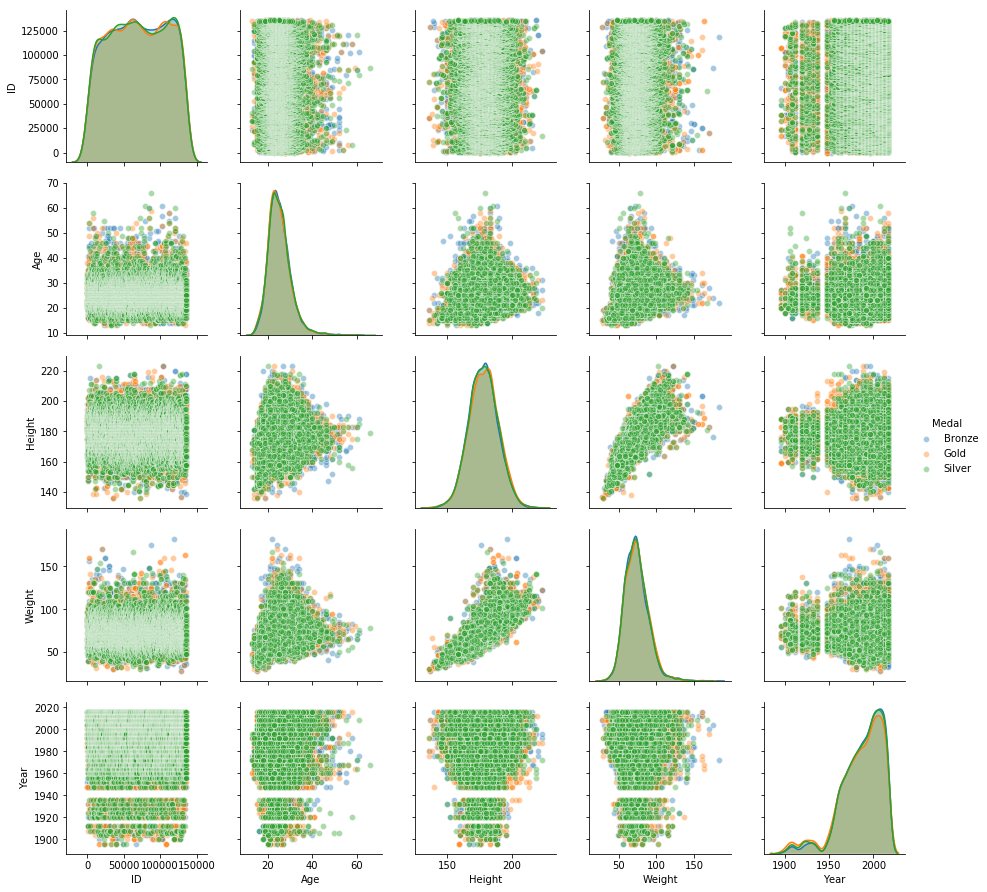

In [13]:
#pairplot for summer_olympics, colored by medal
sns.pairplot(summer_olympics, hue='Medal', plot_kws={'alpha':0.40})


In the plots above, there appears to be a strong positive correlation between weight and height, as well as age and height. Additionally, there are several outliers in the weight category, but most olympians seem to fall within a certain weight range. 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


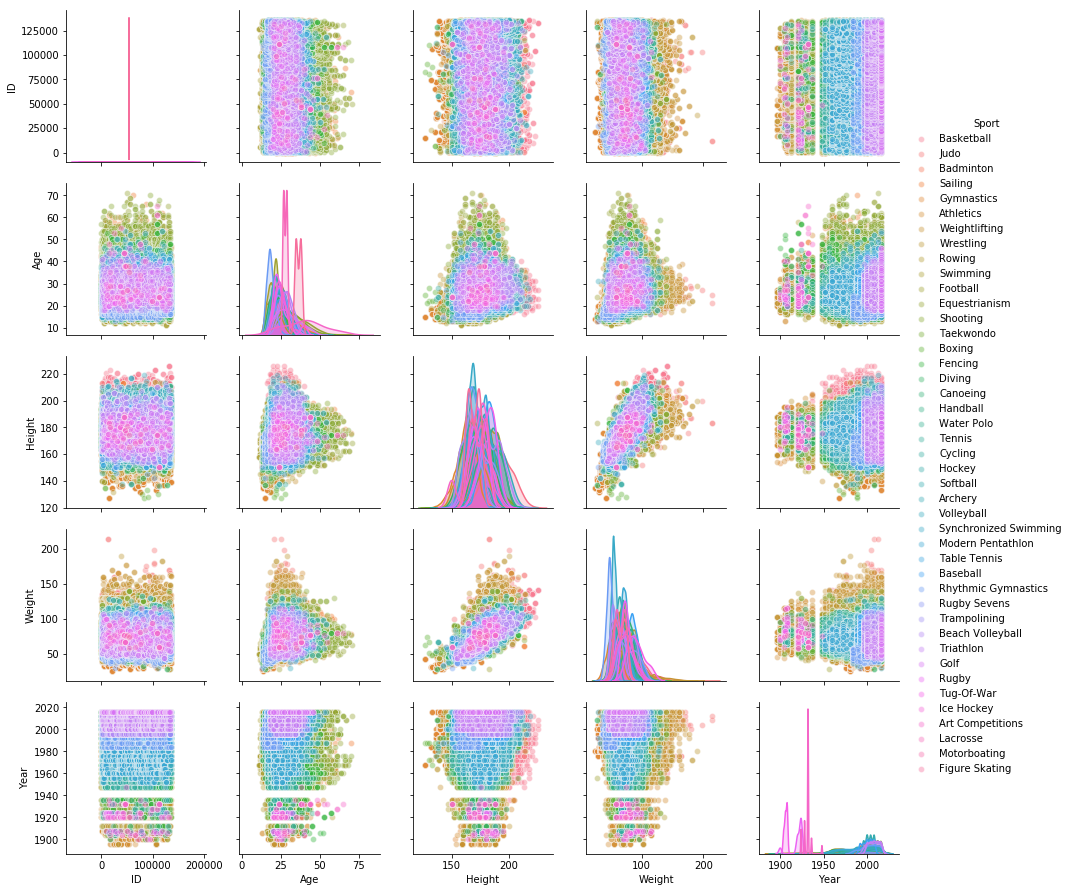

In [14]:
#pairplot for summer_olympics, colored by sport
sns.pairplot(summer_olympics, hue='Sport', plot_kws={'alpha':0.40})

From the pairplots above, some interesting trends start to emerge. The first noticeable trend that appears is between age and sport; the majority of physically demanding sports tend to have olympians that are below 35 in age, while equestrian sports and art competitions tend to have olympians that are above 45 in age. Another trend that becomes appparent is between weight/height and sport. There are several outliers that appear in the pairplot for height/weight but the sports tend to be clustered together for height/weight ranges. The last noticeable trend is that the age, height, and weight have all increased in range over the years but narrowed with the last summer olympic competition (2016, Rio de Janeiro). 

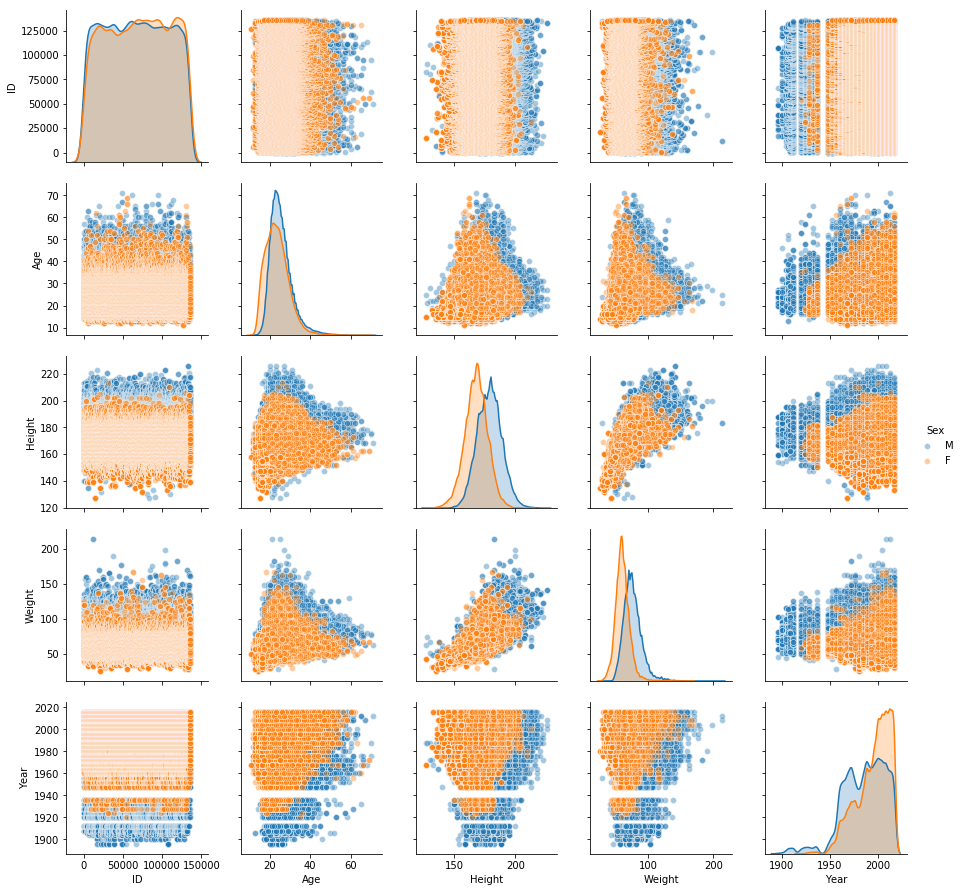

In [15]:
#pairplot for summer_olympics, colored by sport
sns.pairplot(summer_olympics, hue='Sex', plot_kws={'alpha':0.40})

Separating the charts by sex reveals well-known patterns: female athletes generally (but not always) weigh less than the male athletes and are generally shorter. Interestingly, the female athletes also tend to be younger than the male athletes (though there are very clearly a handful of outliers). Despite these differences, there is still a clear, positive correlation between height/weight and age/height for both sexes.

After using pairplots,  a series of histograms and scatterplots were used to focus in on data that appeared to have a trend in the pairplots. 

Text(0, 0.5, 'Count')

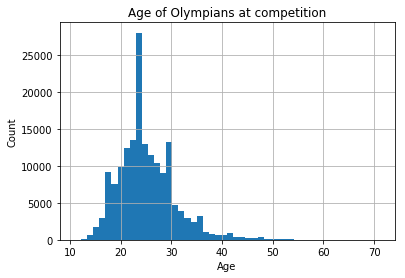

In [17]:
# Histogram of Olympian's ages at competition
summer_olympics.hist(column='Age', bins=50)
plt.title("Age of Olympians at competition")
plt.xlabel("Age")
plt.ylabel("Count")

In the histogram above, there is a very clear peak at age 24, revealing that 24 is the most common age for an olympian to compete at. The histogram is right-skewed, but does significantly trail off as athlete's age approaches 40. Outliers would be athletes above 40, with extreme outliers above 50 years of age. 

Text(0.5, 1.0, 'Height vs. Age of Olympians')

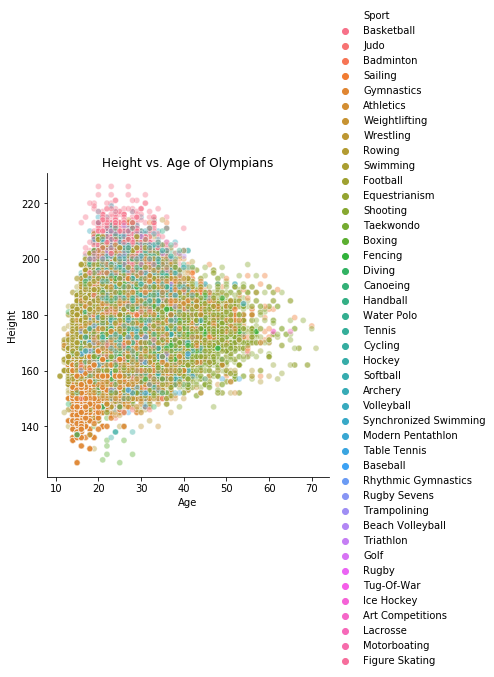

In [18]:
# Scatterplot: Height vs. Age
sns.relplot(x='Age', y='Height', data=summer_olympics, hue='Sport', alpha=0.4)
plt.title('Height vs. Age of Olympians')

In the scatterplot of height vs. age, there is a very clear positive correlation. It appears that the height may vary with each sport as indicated by the light pink clusters in the top left and the green towards the right. At the bottom of the chart are a few outliers for the height category as well as a cluster of olympic gymnasts. 

Text(0.5, 1.0, 'Weight vs. Height')

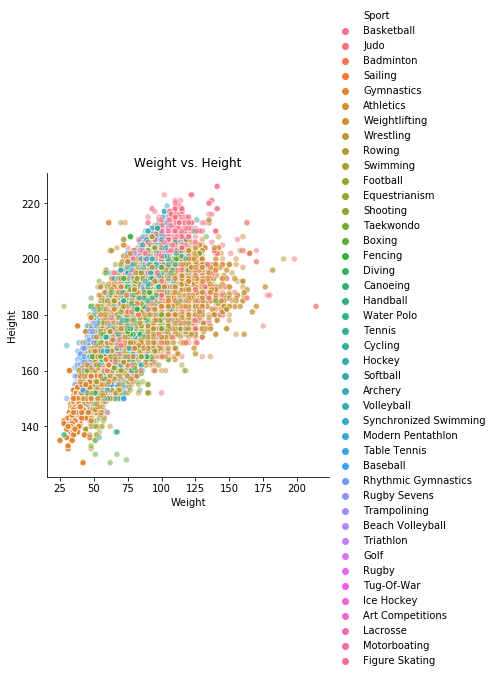

In [19]:
# Scatterplot: Weight vs. Height
sns.relplot(x='Weight', y='Height', data=summer_olympics, hue='Sport', alpha=0.5)
plt.title("Weight vs. Height")

As there is an established correlation between weight and height, this chart was then mapped with sports to find patterns in the weight/height of athletes by sport. Again, a pattern emerges in this chart as gymnasts tend to be on the lower end of both height and weight while basketball players are nearly all towards the maximum value for height and above the median on weight. 

Text(0.5, 1.0, 'Age by year of medaling athletes')

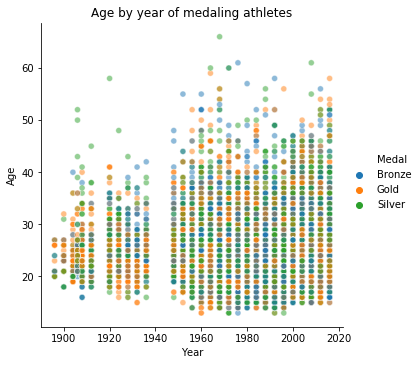

In [20]:
# Scatterplot of Age by Year of medaling athletes
sns.relplot(x='Year', y='Age', hue='Medal', data=summer_olympics, alpha=0.5)
plt.title("Age by year of medaling athletes")


Separating out athlete's age by each competition has revealed some interesting results, especially when comparing the medalists to the full set of olympians in the chart below. Overall, the age range of olympians increased from 1986 to 1976. However, since the olympic games in 1980, the age range of athletes has fluctuated, with the majority of athletes still falling between the range of 13 and 45 years of age. Some of this difference may be due to the addition of sports (such as softball) or the discontinuation of sports (such as tug of war and art competitions). The sudden drop in age range during the 1980 and 1984 olympics may also be attributed to the refusal of countries to participate in the olympics based on political climates. 

When comparing the chart below to the chart of medalists, it becomes clear that nearly all medalists are below age 50, with just a handful of outliers medaling in their sport past age 50.

Text(0.5, 1.0, 'Age of olympians by year, colored by sport')

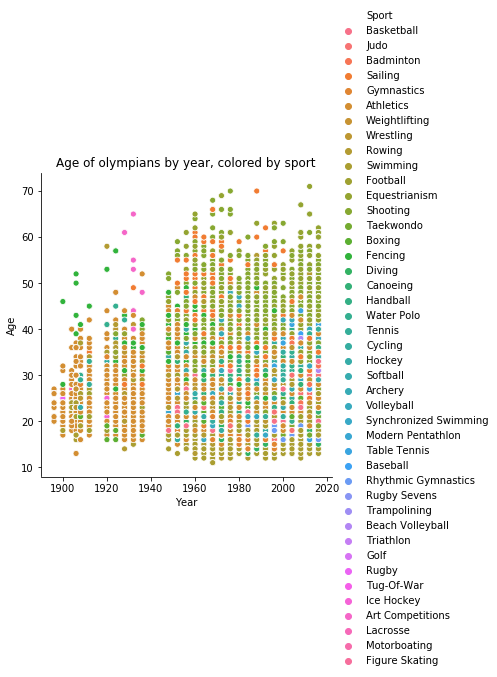

In [21]:
# Scatterplot of age by year, colored by sport
sns.relplot(x='Year', y='Age', hue='Sport', data=summer_olympics)
plt.title("Age of olympians by year, colored by sport")

The next set of charts further delved into the range of weights of athletes, separated by each olympic game. Unlike age, the weight of olympic athletes tends to stay in a narrow range, mostly between 40 kg and 150 kg. From the chart organized by sports, there are some outliers for sports such as judo, ice hockey, weightlifting, and wrestling. When comparing the full dataset to the medalists, the narrowing of the weight range is hard to miss. Compared to the range of (40kg: 150kg) of olympians competing (excluding outliers), the medalists range in the last three years is (40kg: 140kg), indicating that there may be an advantage to being lower weight (outliers excluded). 

Text(0.5, 1.0, 'Weight vs. Year for Medalists')

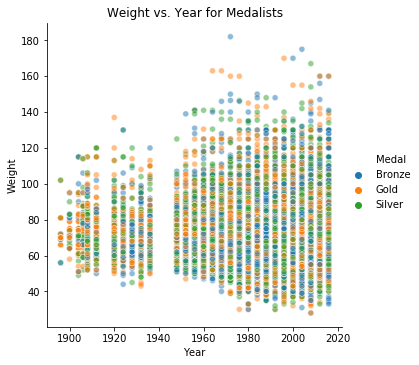

In [22]:
# Scatterplot of Weight vs. Year, colored by Medal
sns.relplot(x='Year', y='Weight', hue='Medal', data=summer_olympics, alpha=0.5)
plt.title("Weight vs. Year for Medalists")

Text(0.5, 1.0, "Weight vs. Year, by athlete's sport")

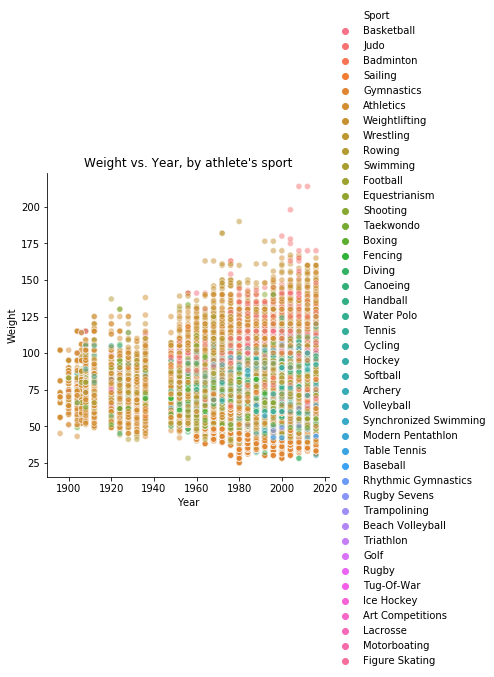

In [23]:
# Scatterplot for Weight vs. Year, colored by olympian's sport
sns.relplot(x='Year', y='Weight', hue='Sport', data=summer_olympics, alpha=0.5)
plt.title("Weight vs. Year, by athlete's sport")

Just as with age and weight, the range of height as increased since the summer 1896 olympics. During the first few olympic games in the data set the height range of athletes was narrow, ranging from 160 cm to 195 cm. However, since the 1988 olympic games, the height of olympians has ranged from about 140 cm to 220 cm (with a few outliers). This increased range in height does not show an impact on medalling overall, as the height range for olympic medalists is just as wide. 

Looking at the height vs year by athlete's sport, an athlete's height does seem to have an impact on the sport they are paticipating in. Basketball players tend to be tall, with most between 200 cm and 220 cm in height. Gymnasts, on the other hand, fall in the shorter range of athletes, with most betwween 140 cm and 160 cm. 

Text(0.5, 1.0, 'Height vs. Year for Medalists')

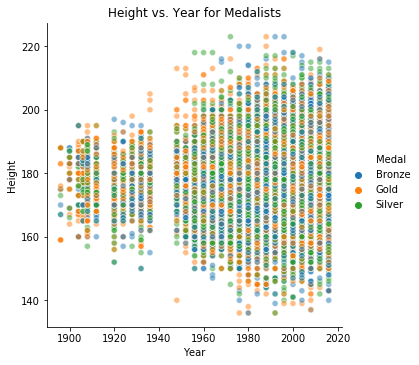

In [26]:
# Scatterplot of Height vs. Year for Medalists
sns.relplot(x='Year', y='Height', hue='Medal', data=summer_olympics, alpha=0.5)
plt.title("Height vs. Year for Medalists")

Text(0.5, 1.0, "Height vs. Year, by athlete's sport")

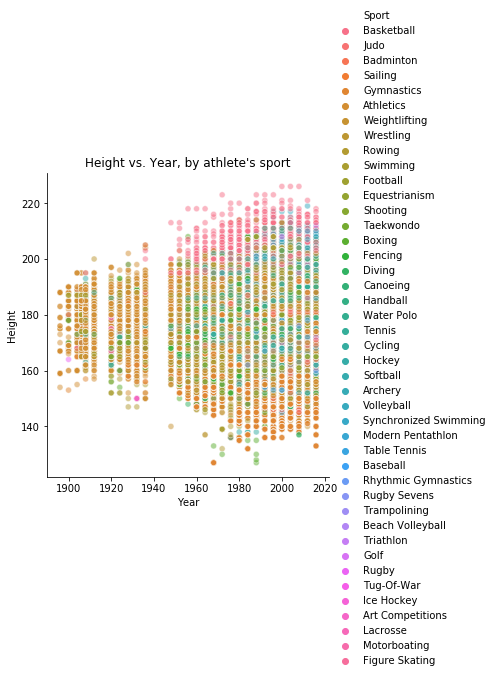

In [27]:
# Scatterplot for Height vs. Year, colored by olympian's sport
sns.relplot(x='Year', y='Height', hue='Sport', data=summer_olympics, alpha=0.5)
plt.title("Height vs. Year, by athlete's sport")

### 6. Transforming categorical columns into binomial values

The next step in looking at the data was to transform the categorical columns of 'Sex', 'Medals', and 'Sports' into binomial categories so that they could be analyzed in regressions as well as used for predictive modeling. These columns were selected as they each have clear impacts on the data. 

The NOC column was not transformed as some olympic competitors are able to choose the team they participate on for the competitions based on their family background. As each country's olympic committee sets the standard for participation in their team and not all teams require participants to be residents or citizens from that area, this column was deliberately left alone. 

In [28]:
# Create dummy columns for categorical variables
sex = pd.get_dummies(summer_olympics['Sex'])
medals = pd.get_dummies(summer_olympics['Medal'])
sports = pd.get_dummies(summer_olympics['Sport'])

In [29]:
# Concatenate dummy columns with summer olympics dataset
sum_olympics = pd.concat([summer_olympics, sex, medals], axis=1)
sum_olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,Sport,Event,Medal,region,notes,F,M,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,...,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,1,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,...,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,1,0,0,0
31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,...,Badminton,Badminton Men's Singles,NaN,Finland,NaN,0,1,0,0,0
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,...,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN,1,0,0,0,0
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,...,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN,1,0,0,0,0


In [30]:
# Concatenate sports dummy columns to dataset
sum_olymp = pd.concat([sum_olympics, sports], axis=1)
sum_olymp.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,Table Tennis,Taekwondo,Tennis,Trampolining,Triathlon,Tug-Of-War,Volleyball,Water Polo,Weightlifting,Wrestling
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,...,0,0,0,0,0,0,0,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,...,0,0,0,0,0,0,0,0,0,0
31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,...,0,0,0,0,0,0,0,0,0,0
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,...,0,0,0,0,0,0,0,0,0,0
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,...,0,0,0,0,0,0,0,0,0,0
